In [1]:
import pandas as pd
import networkx as nx

In [6]:
data = pd.read_csv('/Users/ethanwu/Desktop/Python/Fubon/01. Knowledge Graph/Sample Code/wiki_sentences_extract.csv')
del data["0"] 
data.columns = ["Subject","Object","Relation"]

,Subject,Object,Relation
0,later woman,distance,heard in
1,christian,then elder,paralyzed by
2,temple,fire,set on


In [7]:
data = data[data['Relation'].isin(list(data['Relation'].value_counts()[:20].index))].reset_index(drop=True)

In [8]:
data.head(3)

,Subject,Object,Relation
0,it,religious awakening,'s
1,it,reviewed franchise,is
2,soundtrack,digitally june,released


In [10]:
data['Relation'].value_counts()

is             370
was            297
released on     87
include         73
are             71
were            71
released        40
's              38
composed by     35
has             31
became          31
have            31
become          29
released in     27
included        26
called          22
produced        22
considered      20
had             20
made            20
Name: Relation, dtype: int64

### Visulization

In [13]:
import matplotlib.pyplot as plt

In [12]:
G = nx.from_pandas_edgelist(data[data['Relation']=='released'],'Subject','Object',
                           edge_attr = 'str', create_using=nx.MultiDiGraph())

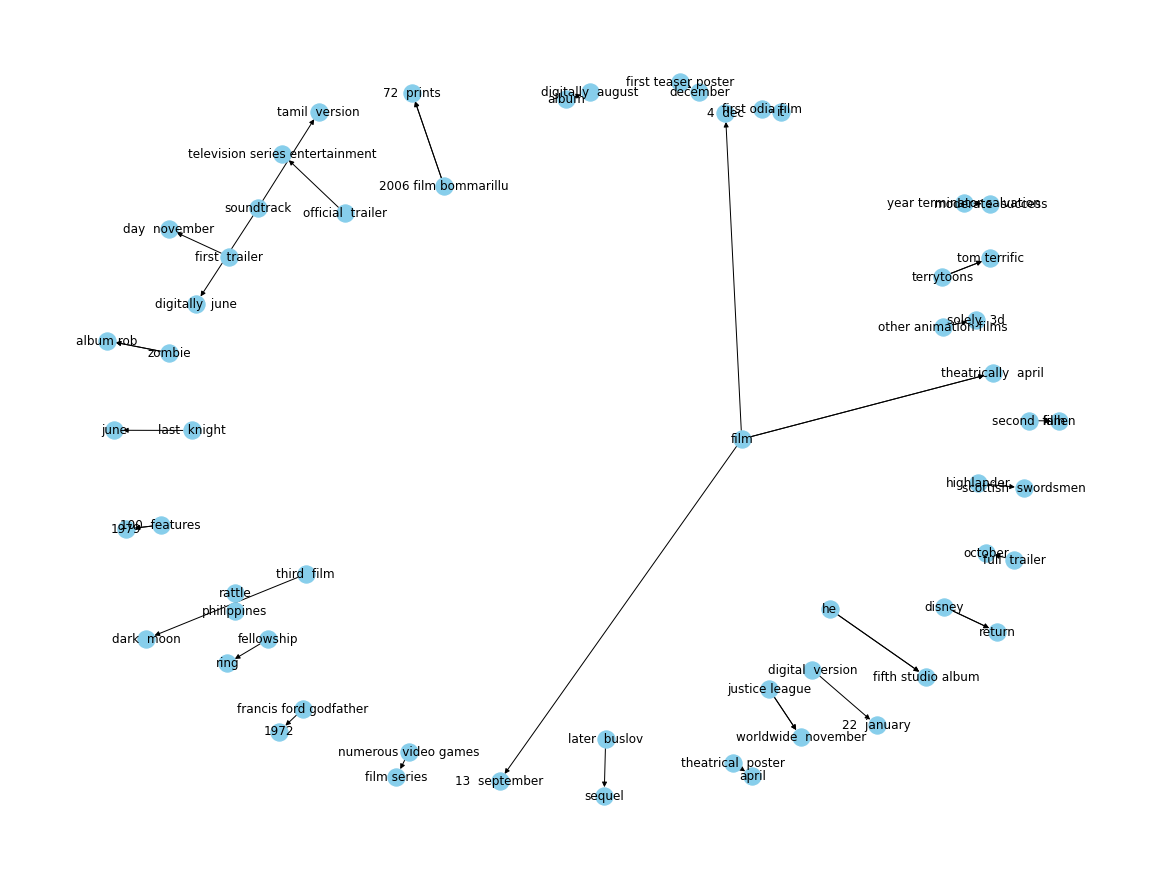

In [21]:
plt.figure(figsize=(16,12))

pos = nx.spring_layout(G)
nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap = plt.cm.Blues,pos=pos)
plt.show()

### Demonstration - "Subject" to "Object"

In [23]:
data_array = data[["Subject","Object"]].values
data_array[0:5]

array([['it', 'religious  awakening'],
       ['it', 'reviewed  franchise'],
       ['soundtrack', 'digitally  june'],
       ['album', 'digitally  august'],
       ['only  mandate', 'monarch']], dtype=object)

In [33]:
from collections import defaultdict
Adj_Dict = defaultdict(list)
Adj_RDict = defaultdict(list)

In [34]:
for s,o in data_array[0:5]:
    Adj_Dict[s].append(o)
    Adj_RDict[o].append(s)

In [35]:
Adj_Dict

defaultdict(list,
            {'it': ['religious  awakening', 'reviewed  franchise'],
             'soundtrack': ['digitally  june'],
             'album': ['digitally  august'],
             'only  mandate': ['monarch']})

### Demonstration - "Subject" to "Object" with "Relation"

In [36]:
data_array = data[["Subject","Object","Relation"]].values
data_array[0:5]

array([['it', 'religious  awakening', "'s"],
       ['it', 'reviewed  franchise', 'is'],
       ['soundtrack', 'digitally  june', 'released'],
       ['album', 'digitally  august', 'released'],
       ['only  mandate', 'monarch', 'was']], dtype=object)

In [37]:
from collections import defaultdict
Adj_Dict = defaultdict(list)
Adj_RDict = defaultdict(list)

In [38]:
for s,o,r in data_array[0:5]:
    Adj_Dict[s].append((o,r)) #tuple
    Adj_RDict[o].append((s,r))

In [39]:
Adj_Dict

defaultdict(list,
            {'it': [('religious  awakening', "'s"),
              ('reviewed  franchise', 'is')],
             'soundtrack': [('digitally  june', 'released')],
             'album': [('digitally  august', 'released')],
             'only  mandate': [('monarch', 'was')]})

In [40]:
Adj_Dict['it']

[('religious  awakening', "'s"), ('reviewed  franchise', 'is')]

In [41]:
Adj_Dict['it'][0][1]

"'s"

### Depth-First Search 

In [57]:
data_array[0:15,0:2].flatten()

array(['it', 'religious  awakening', 'it', 'reviewed  franchise',
       'soundtrack', 'digitally  june', 'album', 'digitally  august',
       'only  mandate', 'monarch', 'film', 'this', 'single', 'may',
       'first teaser poster', 'december', 'theatrical  poster', 'april',
       'it', 'science fiction twist', 'examples',
       'indiana jones franchise', 'mall cop', 'recent  trend', 'they',
       'often entertainment storytelling', 'national film awards',
       'prominent film award india', 'film', 'short samuel beckett'],
      dtype=object)

In [62]:
data_array = np.array([['it', 'religious  awakening'],
       ['it', 'reviewed  franchise'],
       ['reviewed  franchise', 'digitally  june'],
       ['album', 'digitally  august']])

In [63]:
data_array

array([['it', 'religious  awakening'],
       ['it', 'reviewed  franchise'],
       ['reviewed  franchise', 'digitally  june'],
       ['album', 'digitally  august']], dtype='<U20')

In [65]:
#unique value
import numpy as np
SubWords = np.unique(data_array[:,0])
SubWords

array(['album', 'it', 'reviewed  franchise'], dtype='<U20')

In [66]:
Adj_Dict = defaultdict(list)
Adj_RDict = defaultdict(list)

In [67]:
for s,o in data_array:
    Adj_Dict[s].append(o)
    Adj_RDict[o].append(s)

In [68]:
Adj_Dict

defaultdict(list,
            {'it': ['religious  awakening', 'reviewed  franchise'],
             'reviewed  franchise': ['digitally  june'],
             'album': ['digitally  august']})

In [71]:
visit_d = defaultdict()

In [69]:
Adj_Dict['it']

['religious  awakening', 'reviewed  franchise']

In [75]:
def DFS_func(x,Adj):
    if Adj_Dict[x] ==[]:
        visit_d[x]=1
        return
    for y in Adj_Dict[x]:
        if visit_d.get(y)==None:
            DFS_func(y,Adj)

In [ ]:
for words in SubWords:
    DFS_func(words,)